In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from collections import namedtuple
from random import sample
import matplotlib.image as mpimg
from PIL import Image
from sklearn.cluster import AgglomerativeClustering
import time
%matplotlib inline

In [2]:
mat = loadmat("data/Lab6/ex6data1.mat")
X = mat["X"]

In [3]:
def k_means_cluster(points, cluster_count, max_iter=100):
    centroids=find_random_centroids(points, cluster_count)
    old_cluster_idxes=assign_points_to_centroids(centroids, points)
    yield old_cluster_idxes, centroids
    for i in range(max_iter):
        print(f"Run iteration {i}")
        centroids=calculate_mean_centroids(points, old_cluster_idxes, cluster_count)
        new_cluster_idxes=assign_points_to_centroids(centroids, points)
        yield new_cluster_idxes, centroids
        if np.all(new_cluster_idxes==old_cluster_idxes):
            break
        else:
            old_cluster_idxes=new_cluster_idxes
    return new_cluster_idxes, centroids
        
def assign_points_to_centroids(centroids, points):
    cluster_idxes=[]
    for point in points:
        cluster_idx=find_cluster(point, centroids)
        cluster_idxes.append(cluster_idx)
    return np.array(cluster_idxes)
        
def find_random_centroids(points, cluster_count):
    indexes=sample(range(points.shape[0]), cluster_count)
    centroids=points[np.array(indexes), :]
    return centroids

def find_cluster(point, centroids):
    return np.argmin(compute_distance(point, centroids))

def compute_distance(point, centroids):
    return np.square(np.linalg.norm(centroids-point, axis=1))

def calculate_mean_centroids(points, cluster_idxes, cluster_count):
    new_centroids=np.zeros((cluster_count, points.shape[1]))
    for cluster_idx in cluster_idxes:
        cluster_points=points[cluster_idxes==cluster_idx]
        centroid=np.sum(cluster_points, axis=0)/cluster_points.shape[0]
        new_centroids[cluster_idx, :]=centroid[:]
    return new_centroids

In [4]:
def plot_kmeans(cluster_idxes, centroids, points):    
    fig, ax = plt.subplots(nrows=len(cluster_idxes),ncols=1,figsize=(6,36))
    for i in range(len(cluster_idxes)): 
        current_cluster_idxes=cluster_idxes[i]
        current_centroids=centroids[i]
        color = "rgb"
        for cluster_idx in set(current_cluster_idxes):
            cluster_points=points[current_cluster_idxes==cluster_idx]
            ax[i].scatter(cluster_points[:, 0],cluster_points[:, 1],c=color[cluster_idx],s=15)
        ax[i].scatter(current_centroids[:,0], current_centroids[:,1],s=120,marker="x", c="black",linewidth=3)
        title = f"Iteration Number {i}"
        ax[i].set_title(title)    
    plt.tight_layout()

Run iteration 0
Run iteration 1
Run iteration 2
Run iteration 3
Run iteration 4


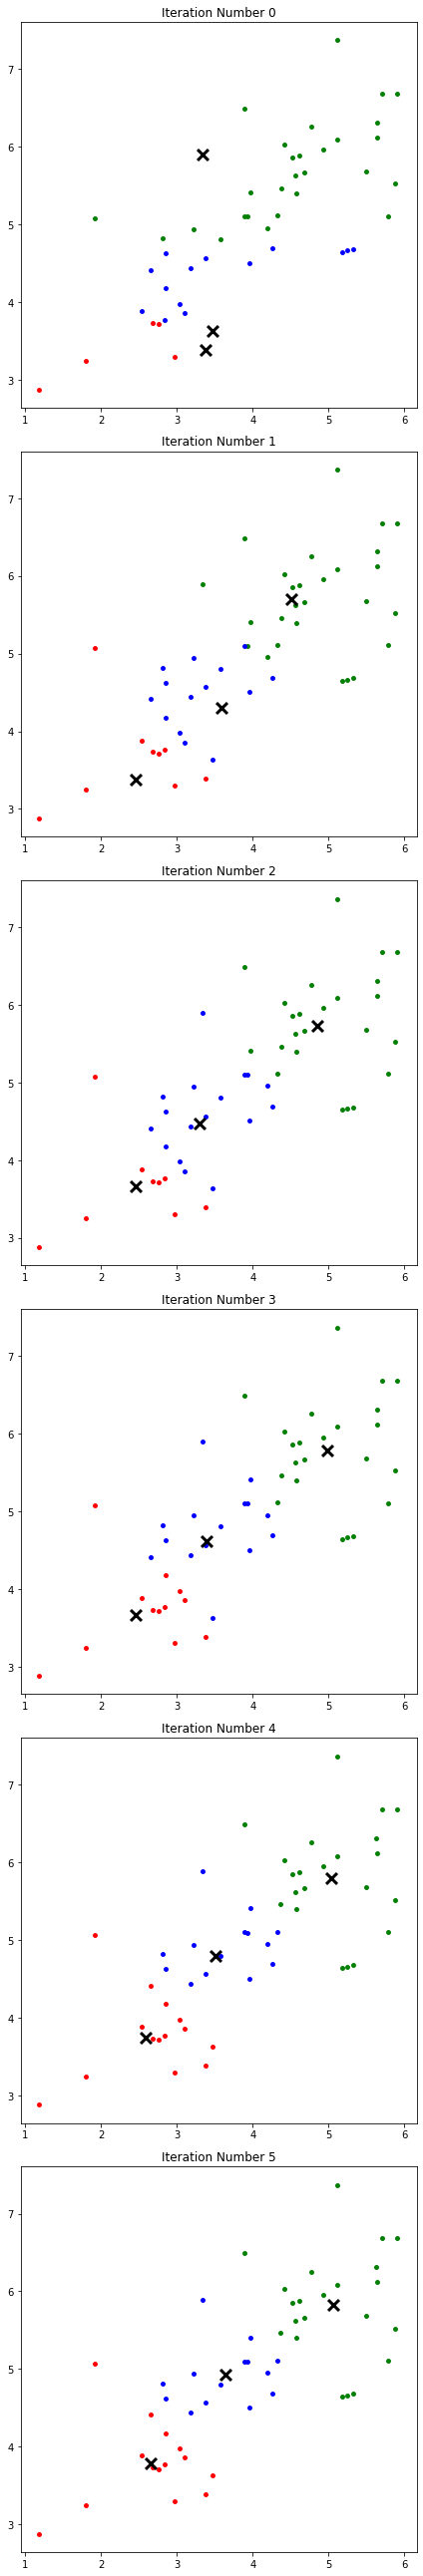

In [5]:
cluster_idxes, centroids=list(zip(*list(k_means_cluster(X, 3))))
cluster_idxes=list(cluster_idxes)
centroids=list(centroids)
plot_kmeans(cluster_idxes, centroids, X)

Run iteration 0
Run iteration 1
Run iteration 2
Run iteration 3
Run iteration 4
Run iteration 5
Run iteration 6
Run iteration 7
Run iteration 8
Run iteration 9
birds_mall clusterization time 12.822888851165771


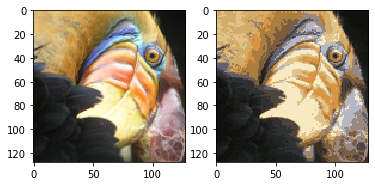

In [6]:
bird_mat = loadmat("data/Lab6/bird_small.mat")
bird_image = bird_mat["A"].reshape(128*128,3)
start = time.time()
cluster_idxes, centroids=list(zip(*list(k_means_cluster(bird_image, 16, 10))))
end = time.time()
print(f"birds_mall clusterization time {end-start}")
image_compressed=bird_image.copy()
cluster_idxes_last=cluster_idxes[-1]
centroids_last=centroids[-1]
for i in set(cluster_idxes_last):
    image_compressed[cluster_idxes_last==i,:] = centroids_last[i, :]
image_compressed = image_compressed.reshape(128,128,3)
fig, ax = plt.subplots(1,2)
ax[0].imshow(bird_image.reshape(128,128,3))
ax[1].imshow(image_compressed)

Run iteration 0
Run iteration 1
Run iteration 2
Run iteration 3
Run iteration 4
Run iteration 5
Run iteration 6
Run iteration 7
Run iteration 8
Run iteration 9
Fratercula clusterization time 1515.077585220337


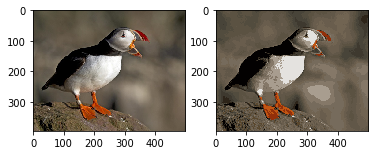

In [7]:
fratercula_jpg=Image.open("data/Lab6/fratercula.jpg")
fratercula_image = np.array(fratercula_jpg)
fratercula_image=fratercula_image.reshape(396*500,3)
start = time.time()
cluster_idxes, centroids=list(zip(*list(k_means_cluster(fratercula_image, 16, 10))))
end = time.time()
print(f"Fratercula clusterization time {end-start}")
fratercula_compressed_kmeans=fratercula_image.copy()
cluster_idxes_last=cluster_idxes[-1]
centroids_last=centroids[-1]
for i in set(cluster_idxes_last):
    fratercula_compressed_kmeans[cluster_idxes_last==i,:] = centroids_last[i, :]
fratercula_compressed_kmeans = fratercula_compressed_kmeans.reshape(396,500,3)
fig, ax = plt.subplots(1,2)
ax[0].imshow(fratercula_image.reshape(396,500,3))
ax[1].imshow(fratercula_compressed_kmeans)

bird_small clusterization 7.119346618652344


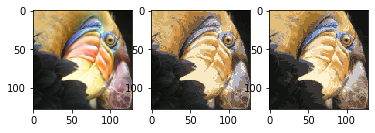

In [11]:
start = time.time()
ag_clustering = AgglomerativeClustering(n_clusters=16).fit(bird_image)
end =  time.time()
print(f"bird_small clusterization {end-start}")
bird_image_compressed_ag=bird_image.copy()
for i in set(ag_clustering.labels_):
    cluster_points=bird_image_compressed_ag[ag_clustering.labels_==i,:]
    centroid=np.sum(cluster_points, axis=0)/cluster_points.shape[0]
    bird_image_compressed_ag[ag_clustering.labels_==i,:] = centroid
bird_image_compressed_ag = bird_image_compressed_ag.reshape(128,128,3)
fig, ax = plt.subplots(1,3)
ax[0].imshow(bird_image.reshape(128,128,3))
ax[1].imshow(image_compressed)
ax[2].imshow(bird_image_compressed_ag)